In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [299]:
train_df = pd.read_csv("train_nas101_4k_medium.csv")
val_df = pd.read_csv("val_nas101_4k_medium.csv")
test_df = pd.read_csv("test_nas101_4k_medium.csv")
nas201_cf10_preds_df = pd.read_csv("nas201_cf10_preds_df.csv")
nas201_imgnet = pd.read_csv('nas201_imgnet.csv')
nas201_cf10 = pd.read_csv('nas201_cf10.csv')
nas201_cf100 = pd.read_csv('nas201_cf100.csv')
test_201_imgnet_df = pd.merge(nas201_cf10_preds_df, nas201_imgnet, left_on="hashes", right_on="idx").fillna(1.0)
test_201_cf10_df = pd.merge(nas201_cf10_preds_df, nas201_cf10, left_on="hashes", right_on="idx").fillna(1.0)
test_201_cf100_df = pd.merge(nas201_cf10_preds_df, nas201_cf100, left_on="hashes", right_on="idx").fillna(1.0)

In [300]:
nas101_train_preds = pd.read_csv("nas101_train_preds.csv")
nas101_val_preds = pd.read_csv("nas101_val_preds.csv")
nas101_test_preds = pd.read_csv("nas101_test_preds.csv")
nas201_test_preds = pd.read_csv("nas201_test_preds.csv")

In [301]:
new_train_df = pd.merge(nas101_train_preds[['hashes','raw_pred']], train_df, left_on="hashes", right_on="hash")
new_val_df = pd.merge(nas101_val_preds[['hashes','raw_pred']], val_df, left_on="hashes", right_on="hash")
new_test_df = pd.merge(nas101_test_preds[['hashes','raw_pred']], test_df, left_on="hashes", right_on="hash")
new_test_201_imgnet_df = pd.merge(nas201_test_preds[['hashes','raw_pred']], test_201_imgnet_df, left_on="hashes", right_on="idx").fillna(1.0)
new_test_201_cf10_df = pd.merge(nas201_test_preds[['hashes','raw_pred']], test_201_cf10_df, left_on="hashes", right_on="idx").fillna(1.0)
new_test_201_cf100_df = pd.merge(nas201_test_preds[['hashes','raw_pred']], test_201_cf100_df, left_on="hashes", right_on="idx").fillna(1.0)
len(new_test_201_cf100_df), len(new_test_201_cf10_df), len(new_test_201_imgnet_df)

(15625, 15625, 15625)

In [302]:
metrics = ['plain', 'snip', 'grasp', 'fisher', 'synflow_bn',
       'grad_norm', 'jacob_cov']
for metric in metrics:
    new_train_df[f"pred_x_{metric}"] = new_train_df["pred"] * new_train_df[metric]
    new_val_df[f"pred_x_{metric}"] = new_val_df["pred"] * new_val_df[metric]
    new_test_df[f"pred_x_{metric}"] = new_test_df["pred"] * new_test_df[metric]
    new_test_201_imgnet_df[f"pred_x_{metric}"] = new_test_201_imgnet_df["pred"] * new_test_201_imgnet_df[metric]
    new_test_201_cf10_df[f"pred_x_{metric}"] = new_test_201_cf10_df["pred"] * new_test_201_cf10_df[metric]
    new_test_201_cf100_df[f"pred_x_{metric}"] = new_test_201_cf100_df["pred"] * new_test_201_cf100_df[metric]
    
    new_train_df[f"raw_pred_x_{metric}"] = new_train_df["raw_pred"] * new_train_df[metric]
    new_val_df[f"raw_pred_x_{metric}"] = new_val_df["raw_pred"] * new_val_df[metric]
    new_test_df[f"raw_pred_x_{metric}"] = new_test_df["raw_pred"] * new_test_df[metric]
    new_test_201_imgnet_df[f"raw_pred_x_{metric}"] = new_test_201_imgnet_df["raw_pred"] * new_test_201_imgnet_df[metric]
    new_test_201_cf10_df[f"raw_pred_x_{metric}"] = new_test_201_cf10_df["raw_pred"] * new_test_201_cf10_df[metric]
    new_test_201_cf100_df[f"raw_pred_x_{metric}"] = new_test_201_cf100_df["raw_pred"] * new_test_201_cf100_df[metric]

In [303]:
new_train_df.columns

Index(['hashes', 'raw_pred', 'Unnamed: 0', 'plain', 'snip', 'grasp', 'fisher',
       'synflow', 'synflow_bn', 'grad_norm', 'l2_norm', 'jacob_cov', 'hash',
       'pred', 'target', 'pred_x_plain', 'raw_pred_x_plain', 'pred_x_snip',
       'raw_pred_x_snip', 'pred_x_grasp', 'raw_pred_x_grasp', 'pred_x_fisher',
       'raw_pred_x_fisher', 'pred_x_synflow_bn', 'raw_pred_x_synflow_bn',
       'pred_x_grad_norm', 'raw_pred_x_grad_norm', 'pred_x_jacob_cov',
       'raw_pred_x_jacob_cov'],
      dtype='object')

## Random Forest Attempts

In [321]:
predictor_cols = ['raw_pred', 'plain', 'snip', 'grasp', 'fisher',
'synflow_bn', 'grad_norm', 'jacob_cov',
'pred', 'pred_x_plain', 'raw_pred_x_plain', 'pred_x_snip',
'raw_pred_x_snip', 'pred_x_grasp', 'raw_pred_x_grasp', 'pred_x_fisher',
'raw_pred_x_fisher', 'pred_x_synflow_bn', 'raw_pred_x_synflow_bn',
 'pred_x_grad_norm', 'raw_pred_x_grad_norm', 'pred_x_jacob_cov', 'raw_pred_x_jacob_cov', 'synflow']

predictor_cols2 = ['plain', 'snip', 'grasp', 'fisher',
'synflow_bn', 'grad_norm', 'jacob_cov',
'pred', 'pred_x_plain', 'pred_x_snip',
'pred_x_grasp', 'pred_x_fisher',
'pred_x_synflow_bn', 'pred_x_grad_norm', 'pred_x_jacob_cov']

reg_cols = ['pred_x_plain', 'pred_x_snip', 'pred_x_grasp', 'pred_x_fisher', 'pred_x_synflow_bn', 'pred_x_grad_norm', 'pred_x_jacob_cov']


#predictor_cols = ['synflow_bn', 'jacob_cov']

In [264]:
from sklearn.preprocessing import StandardScaler

X_train = new_train_df[predictor_cols]
y_train = new_train_df["target"]

rf = RandomForestRegressor(n_estimators=100, random_state=109)
rf.fit(X_train, y_train)

/opt/conda/envs/test/lib/python3.9/site-packages/pandas/core/generic.py:2070: RuntimeWarning: overflow encountered in cast
  return np.asarray(self._values, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
from copy import deepcopy

X_train = new_train_df[predictor_cols]
y_train = new_train_df["target"]

X_train_copy = deepcopy(X_train)
for col in X_train.columns:
    X_train_copy[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
X_train_copy

,raw_pred,plain,snip,grasp,fisher,synflow_bn,grad_norm,jacob_cov,pred,pred_x_plain,...,raw_pred_x_grasp,pred_x_fisher,raw_pred_x_fisher,pred_x_synflow_bn,raw_pred_x_synflow_bn,pred_x_grad_norm,raw_pred_x_grad_norm,pred_x_jacob_cov,raw_pred_x_jacob_cov,synflow
0,0.808829,-0.019027,-0.626710,0.125610,-0.098956,-0.006425,-0.646135,0.821593,-0.439298,-0.021666,...,-0.072301,-0.102534,0.050174,-0.006435,-0.004761,-0.663106,0.241730,0.505509,-0.806918,-0.022199
1,0.705424,0.158555,-0.607197,0.125268,-0.099245,-0.006425,-0.649792,0.944564,0.451822,0.204660,...,-0.072165,-0.102809,0.050046,-0.006435,-0.004761,-0.659893,0.232522,-0.349829,-0.703323,-0.022199
2,0.689851,-0.059438,-0.228119,0.095264,-0.074380,-0.006346,-0.057215,-1.343932,0.189788,-0.038590,...,-0.080921,-0.076051,0.057645,-0.006354,-0.004577,-0.044687,0.439873,-0.311433,-0.695593,-0.022199
3,0.860613,-0.530414,-0.499652,0.126315,-0.092442,-0.006425,-0.460189,0.747266,-0.507158,-0.544549,...,-0.072162,-0.095778,0.052685,-0.006435,-0.004761,-0.476942,0.327552,0.564767,-0.858901,-0.022199
4,0.789001,-0.529616,-0.524713,0.128309,-0.096118,-0.006425,-0.496643,0.420460,0.077874,-0.536124,...,-0.071349,-0.099473,0.051161,-0.006435,-0.004761,-0.504189,0.300494,-0.035453,-0.788703,-0.022199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,-0.453825,-0.301348,-0.250697,0.124988,-0.094667,-0.006425,-0.378255,0.539014,0.386856,-0.288806,...,-0.069258,-0.097832,0.048819,-0.006435,-0.004761,-0.374677,0.080993,-0.325396,0.453489,-0.022199
31996,0.670678,-0.679400,-0.379451,0.128312,-0.090313,-0.006394,-0.261863,-0.247148,0.270822,-0.692309,...,-0.071212,-0.093159,0.052692,-0.006403,-0.004691,-0.255529,0.362586,-0.286986,-0.672625,-0.022199
31997,-0.013276,-0.700737,-0.091315,0.128191,-0.075705,-0.006395,0.007161,-2.554506,0.583586,-0.713765,...,-0.070427,-0.076950,0.049628,-0.006403,-0.004764,0.039353,0.171019,-0.815614,0.013694,-0.022199
31998,0.296454,-0.504147,-0.529519,0.129032,-0.098551,-0.006363,-0.566875,-0.928662,0.785311,-0.499218,...,-0.070694,-0.102029,0.050040,-0.006369,-0.004700,-0.568283,0.214371,-0.856747,-0.298233,-0.022199


In [322]:
import numpy as np
from sklearn.linear_model import LinearRegression
X_train = new_train_df[predictor_cols]
y_train = new_train_df["target"]
X_train_copy = deepcopy(X_train)
for col in X_train.columns:
    if col == "synflow":
        val = np.log10(X_train['synflow']).replace([np.inf, -np.inf], 0)
        standard_val = (val - np.mean(val))/np.std(val)
        X_train_copy['synflow'] = standard_val
        X_train_copy['synflow'] = X_train_copy['synflow'].fillna(0)
    else:
        X_train_copy[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
lambda_val = np.abs(np.mean(X_train['raw_pred']))
rf = RandomForestRegressor(n_estimators=100, random_state=109)
rf.fit(X_train[predictor_cols2], y_train)
y_pred = rf.predict(X_train[predictor_cols2])
X_train_copy['vote'] = (1/lambda_val)*y_pred + lambda_val*(X_train_copy['synflow'] + X_train_copy['jacob_cov'])
X_train_copy['vote'] = (X_train_copy['vote'] - X_train_copy['vote'].mean()) / X_train_copy['vote'].std()
print(spearmanr(X_train_copy['vote'], y_train))


SignificanceResult(statistic=0.9859344529584093, pvalue=0.0)


In [307]:
X_train_copy.columns

Index(['raw_pred', 'plain', 'snip', 'grasp', 'fisher', 'synflow_bn',
       'grad_norm', 'jacob_cov', 'pred', 'pred_x_plain', 'raw_pred_x_plain',
       'pred_x_snip', 'raw_pred_x_snip', 'pred_x_grasp', 'raw_pred_x_grasp',
       'pred_x_fisher', 'raw_pred_x_fisher', 'pred_x_synflow_bn',
       'raw_pred_x_synflow_bn', 'pred_x_grad_norm', 'raw_pred_x_grad_norm',
       'pred_x_jacob_cov', 'raw_pred_x_jacob_cov'],
      dtype='object')

In [285]:
print(spearmanr(X_train_copy['synflow'], y_train))


SignificanceResult(statistic=0.37242443343508563, pvalue=0.0)


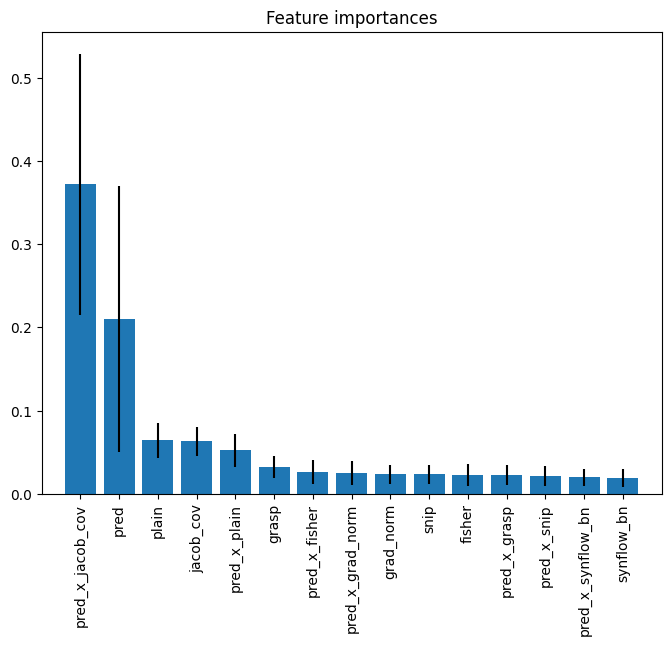

In [324]:
import matplotlib.pyplot as plt
import numpy as np
# Obtain feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = [X_train_copy[predictor_cols2].columns[i] for i in indices]
# Plot the feature importances
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.bar(range(X_train_copy[predictor_cols2].shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train_copy[predictor_cols2].shape[1]), labels, rotation=90)
plt.xlim([-1, X_train_copy[predictor_cols2].shape[1]])
plt.show()

In [326]:
import numpy as np
X_test = new_test_df[predictor_cols]
y_test = new_test_df["target"]
X_test_copy = deepcopy(X_test)
for col in X_test.columns:
    if col == "synflow":
        val = np.log10(X_test['synflow']).replace([np.inf, -np.inf], 0)
        standard_val = (val - np.mean(val))/np.std(val)
        X_test_copy['synflow'] = standard_val
        X_test_copy['synflow'] = X_test_copy['synflow'].fillna(0)
    else:
        X_test_copy[col] = (X_test[col] - X_test[col].mean())/X_test[col].std()
lambda_val = np.abs(np.mean(X_test['raw_pred']))
y_pred = rf.predict(X_test[predictor_cols2])
X_test_copy['vote'] = (1/lambda_val)*y_pred + lambda_val*(X_test_copy['synflow'] + X_test_copy['jacob_cov'])
X_test_copy['vote'] = (X_test_copy['vote'] - X_test_copy['vote'].mean()) / X_test_copy['vote'].std()
spearmanr(y_pred, y_test)

SignificanceResult(statistic=0.9034971742371579, pvalue=0.0)

In [327]:
import numpy as np
X_test = new_test_201_cf10_df[predictor_cols]
y_test = new_test_201_cf10_df["target"]
X_test_copy = deepcopy(X_test)
for col in X_test.columns:
    if col == "synflow":
        val = np.log10(X_test['synflow']).replace([np.inf, -np.inf], 0)
        standard_val = (val - np.mean(val))/np.std(val)
        X_test_copy['synflow'] = standard_val
        X_test_copy['synflow'] = X_test_copy['synflow'].fillna(0)
    else:
        X_test_copy[col] = (X_test[col] - X_test[col].mean())/X_test[col].std()
lambda_val = np.abs(np.mean(X_test['raw_pred']))
y_pred = rf.predict(X_test[predictor_cols2])
X_test_copy['vote'] = (1/lambda_val)*y_pred + lambda_val*(X_test_copy['synflow'] + X_test_copy['jacob_cov'])
X_test_copy['vote'] = (X_test_copy['vote'] - X_test_copy['vote'].mean()) / X_test_copy['vote'].std()
spearmanr(X_test_copy['vote'], y_test)

/opt/conda/envs/test/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


SignificanceResult(statistic=0.7552166496883418, pvalue=0.0)

In [337]:
X_test_copy['vote'] = (1/lambda_val)*y_pred + lambda_val*(X_test_copy['synflow'] + X_test_copy['jacob_cov'] + X_test_copy['grasp'])
X_test_copy['vote'] = (X_test_copy['vote'] - X_test_copy['vote'].mean()) / X_test_copy['vote'].std()
spearmanr(X_test_copy['vote'], y_test)

SignificanceResult(statistic=0.7555716623335613, pvalue=0.0)

In [330]:
X_test_copy["y_pred"] = y_pred
x_test_train = X_test_copy[['synflow', 'jacob_cov', 'y_pred']]
l_reg = LinearRegression()
l_reg.fit(x_test_train, y_test)
new_y_pred = l_reg.predict(x_test_train)
spearmanr(new_y_pred, y_test)

SignificanceResult(statistic=0.7552701836146974, pvalue=0.0)

In [271]:
import numpy as np
X_test = new_test_201_cf100_df[predictor_cols]
y_test = new_test_201_cf100_df["target"]
X_test_copy = deepcopy(X_test)
for col in X_test.columns:
    if col == "synflow":
        val = np.log10(X_test['synflow']).replace([np.inf, -np.inf], 0)
        standard_val = (val - np.mean(val))/np.std(val)
        X_test_copy['synflow'] = standard_val
        X_test_copy['synflow'] = X_test_copy['synflow'].fillna(0)
    else:
        X_test_copy[col] = (X_test[col] - X_test[col].mean())/X_test[col].std()
lambda_val = np.abs(np.mean(X_test['raw_pred']))
print(lambda_val)
X_test_copy['vote'] = (-1/lambda_val)*X_test_copy['pred_x_jacob_cov'] + lambda_val*(X_test_copy['synflow'] + X_test_copy['jacob_cov'])
X_test_copy['vote'] = (X_test_copy['vote'] - X_test_copy['vote'].mean()) / X_test_copy['vote'].std()
spearmanr(X_test_copy['vote'], y_test)

6.015743976465702


/opt/conda/envs/test/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


SignificanceResult(statistic=0.7833639248948105, pvalue=0.0)

In [272]:
import numpy as np
X_test = new_test_201_imgnet_df[predictor_cols]
y_test = new_test_201_imgnet_df["target"]
X_test_copy = deepcopy(X_test)
for col in X_test.columns:
    if col == "synflow":
        val = np.log10(X_test['synflow']).replace([np.inf, -np.inf], 0)
        standard_val = (val - np.mean(val))/np.std(val)
        X_test_copy['synflow'] = standard_val
        X_test_copy['synflow'] = X_test_copy['synflow'].fillna(0)
    else:
        X_test_copy[col] = (X_test[col] - X_test[col].mean())/X_test[col].std()
lambda_val = np.abs(np.mean(X_test['raw_pred']))
print(lambda_val)
X_test_copy['vote'] = (-1/lambda_val)*X_test_copy['pred_x_jacob_cov'] + lambda_val*(X_test_copy['synflow'] + X_test_copy['jacob_cov'])
X_test_copy['vote'] = (X_test_copy['vote'] - X_test_copy['vote'].mean()) / X_test_copy['vote'].std()
spearmanr(X_test_copy['vote'], y_test)

6.015743976465702


/opt/conda/envs/test/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


SignificanceResult(statistic=0.761050836580245, pvalue=0.0)

In [26]:
from scipy.stats import spearmanr

print("NAS-101 CIFAR10 Results")
X_test = new_test_df[predictor_cols]
y_test = new_test_df["target"]

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

NAS-101 CIFAR10 Results
Mean Squared Error: 0.0037019660863479823
R-squared: 0.33728585942262956
Spearman correlation coefficient: 0.912119215833608
p-value: 0.0


In [38]:
spearmanr(new_test_201_imgnet_df['synflow_bn'], new_test_201_imgnet_df["target"])

SignificanceResult(statistic=-0.24108444697225923, pvalue=1.9173720016360744e-205)

In [23]:
print("NAS201 Imagenet Results")
X_test = new_test_201_imgnet_df[predictor_cols]
y_test = new_test_201_imgnet_df["target"]

rf.feature_importances_
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(X_test['jacob_cov'], y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

NAS201 Imagenet Results
Mean Squared Error: 0.2993132449314927
R-squared: -32.069227447930494
Spearman correlation coefficient: 0.49852281802055604
p-value: 0.0


In [16]:
print("NAS201 CIFAR-10 Results")
X_test = new_test_201_cf10_df[predictor_cols]
y_test = new_test_201_cf10_df["target"]

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

NAS201 CIFAR-10 Results
Mean Squared Error: 0.2237299862598076
R-squared: -12.841344186937398
Spearman correlation coefficient: 0.07531812015033977
p-value: 4.2036354986926624e-21


In [17]:
print("NAS201 CIFAR-100 Results")
X_test = new_test_201_cf100_df[predictor_cols]
y_test = new_test_201_cf100_df["target"]

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

NAS201 CIFAR-100 Results
Mean Squared Error: 0.07419146743851363
R-squared: -4.007678094543472
Spearman correlation coefficient: 0.030724201911068845
p-value: 0.0001224718632423116


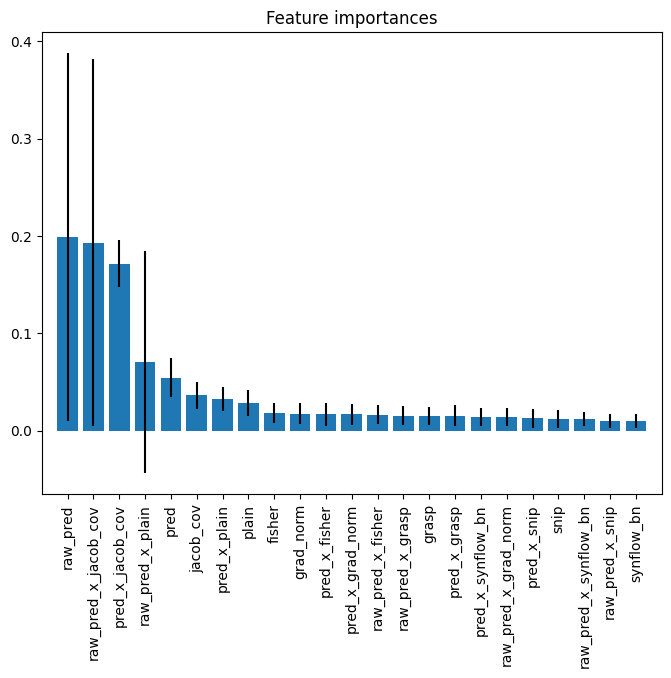

In [27]:
import matplotlib.pyplot as plt
import numpy as np
# Obtain feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = [X_train.columns[i] for i in indices]
# Plot the feature importances
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [50]:
X_train = new_test_201_imgnet_df[predictor_cols]
y_train = new_test_201_imgnet_df["target"]

rf201 = RandomForestRegressor(n_estimators=100, random_state=109)
rf201.fit(X_train, y_train)

RandomForestRegressor(random_state=109)

In [52]:
print("Overfit NAS201 Imagenet Results")
X_test = new_test_201_imgnet_df[predictor_cols]
y_test = new_test_201_imgnet_df["target"]

y_pred = rf201.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

Overfit NAS201 Imagenet Results
Mean Squared Error: 7.273443318324889e-05
R-squared: 0.9919640324811431
Spearman correlation coefficient: 0.993189434717791
p-value: 0.0


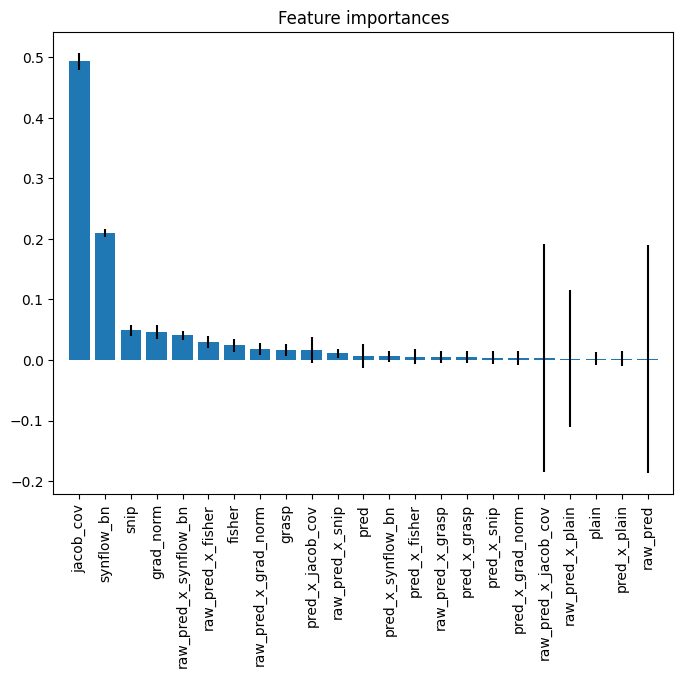

In [54]:
import matplotlib.pyplot as plt
import numpy as np
# Obtain feature importances
importances = rf201.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = [X_train.columns[i] for i in indices]
# Plot the feature importances
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [56]:
X_train = new_test_201_cf10_df[predictor_cols]
y_train = new_test_201_cf10_df["target"]

rf201 = RandomForestRegressor(n_estimators=100, random_state=109)
rf201.fit(X_train, y_train)

RandomForestRegressor(random_state=109)

In [57]:
print("NAS201 CIFAR-10 Results")
X_test = new_test_201_cf10_df[predictor_cols]
y_test = new_test_201_cf10_df["target"]

y_pred = rf201.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

NAS201 CIFAR-10 Results
Mean Squared Error: 8.388151971157151e-05
R-squared: 0.9948105615851468
Spearman correlation coefficient: 0.9938447688903517
p-value: 0.0


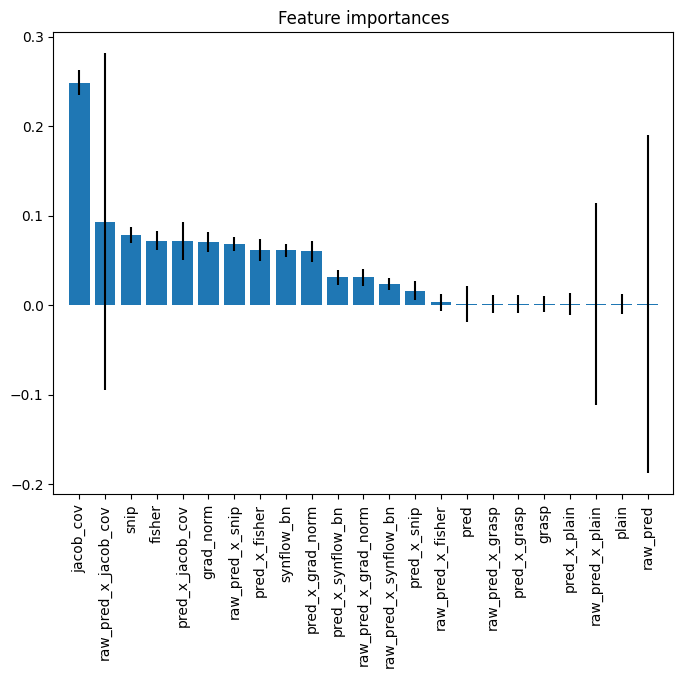

In [58]:
import matplotlib.pyplot as plt
import numpy as np
# Obtain feature importances
importances = rf201.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = [X_train.columns[i] for i in indices]
# Plot the feature importances
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [81]:
X_train = new_test_201_cf100_df[predictor_cols]
y_train = new_test_201_cf100_df["target"]

rf201 = RandomForestRegressor(n_estimators=100, random_state=109)
rf201.fit(X_train, y_train)

RandomForestRegressor(random_state=109)

In [82]:
rf201.feature_importances_

array([0.00682731, 0.13493389, 0.57476462, 0.01251725, 0.06908151,
       0.03979494, 0.05902129, 0.10305919])

In [60]:
print("Overfit NAS201 CIFAR-100 Results")
X_test = new_test_201_cf100_df[predictor_cols]
y_test = new_test_201_cf100_df["target"]

y_pred = rf201.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

Overfit NAS201 CIFAR-100 Results
Mean Squared Error: 9.87309926650893e-05
R-squared: 0.9933359853054363
Spearman correlation coefficient: 0.9942159142938307
p-value: 0.0


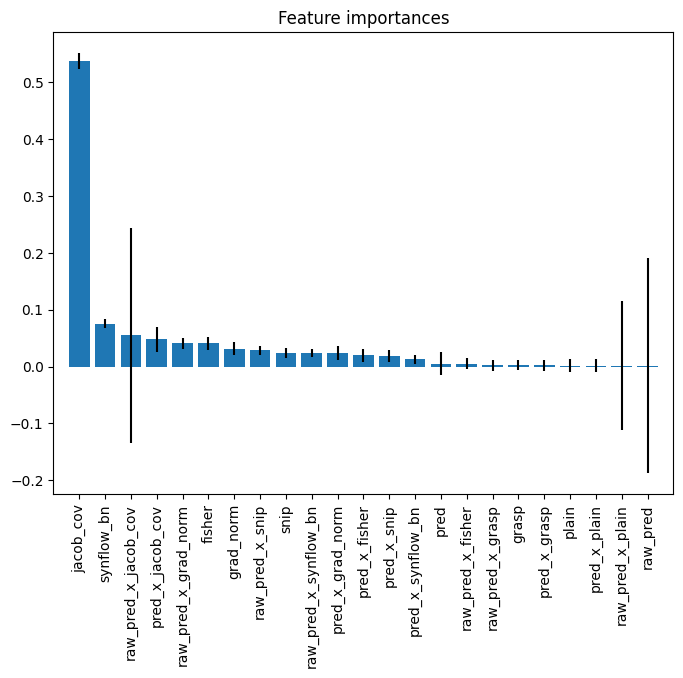

In [61]:
import matplotlib.pyplot as plt
import numpy as np
# Obtain feature importances
importances = rf201.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = [X_train.columns[i] for i in indices]
# Plot the feature importances
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Elastic Net Model

In [64]:
from sklearn.linear_model import ElasticNet

X_train = new_train_df[predictor_cols]
y_train = new_train_df["target"]

X_test = new_test_df[predictor_cols]
y_test = new_test_df["target"]

new_X_test = new_test_201_imgnet_df[predictor_cols]
new_y_test = new_test_201_imgnet_df["target"]
# Create an Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.9)

# Fit the model to the training set
model.fit(X_train, y_train)

print("NAS101 Test")
y_pred = model.predict(X_test)
xmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

print("NAS201 Imgnet Test")
new_y_pred = model.predict(new_X_test)
xmse = mean_squared_error(new_y_test, new_y_pred)
r2 = r2_score(new_y_test, new_y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(new_y_test, new_y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)



NAS101 Test
Mean Squared Error: 9.87309926650893e-05
R-squared: 0.25277229169633364
Spearman correlation coefficient: 0.6493761869779492
p-value: 0.0
NAS201 Imgnet Test
Mean Squared Error: 9.87309926650893e-05
R-squared: -5217.043596511263
Spearman correlation coefficient: 0.36429863871901447
p-value: 0.0


In [68]:
l1_ratio_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
alphas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [66]:
from tqdm import tqdm

In [70]:
data = []
for l1_ratio in tqdm(l1_ratio_values):
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

        # Fit the model to the training set
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        correlation1, p_value1 = spearmanr(y_test, y_pred)
        new_y_pred = model.predict(new_X_test)
        correlation2, p_value2 = spearmanr(new_y_test, new_y_pred)
        data.append((correlation1, correlation2, alpha, l1_ratio))
        data.sort(key=lambda x: x[0])

  0%|          | 0/11 [00:00<?, ?it/s]/tmp/ipykernel_7831/1857597140.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/opt/conda/envs/test/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/test/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.488e+01, tolerance: 1.470e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coord

In [71]:
data

[(0.10202224033833032, 0.4818747193425797, 1.0, 1.0),
 (0.10224027230319505, 0.4823643630413858, 0.9, 1.0),
 (0.10224073102279155, 0.4823641466026909, 1.0, 0.9),
 (0.10229487146645445, 0.483081816198792, 0.9, 0.9),
 (0.10229891678641985, 0.4832056822922186, 1.0, 0.8),
 (0.10229962310022331, 0.48320593858729205, 0.8, 1.0),
 (0.11027579219475754, 0.48020982822092734, 0.9, 0.8),
 (0.11027644516471256, 0.4802098284647214, 0.8, 0.9),
 (0.11529911377749154, 0.47826840541056187, 1.0, 0.7),
 (0.11530015121690608, 0.4782681647120097, 0.7, 1.0),
 (0.13122303413286662, 0.4737523400684323, 0.8, 0.8),
 (0.13389033446145693, 0.4731956386058119, 0.9, 0.7),
 (0.13389249671544723, 0.47319533080572784, 0.7, 0.9),
 (0.14243531023068923, 0.4719266967895722, 1.0, 0.6),
 (0.1424421702120989, 0.47192471086923066, 0.6, 1.0),
 (0.15458805215783422, 0.4689877856079972, 0.8, 0.7),
 (0.1545897626297408, 0.46898712104456697, 0.7, 0.8),
 (0.16058681532193625, 0.4675472298355609, 0.9, 0.6),
 (0.1605912487676179, 0.4

In [74]:
data[-40:]

[(0.6739736634335938, 0.351806261480859, 0.4, 0.2),
 (0.6747102949180024, 0.35144953057504164, 0.2, 0.4),
 (0.67507380605759, 0.3513046599420934, 0.1, 0.8),
 (0.6987225923562347, 0.3369289482955567, 0.7, 0.1),
 (0.7012852047728798, 0.33483478920224236, 0.1, 0.7),
 (0.7247156883561601, 0.31250621032654374, 0.6, 0.1),
 (0.725878424126918, 0.3105136388300582, 0.3, 0.2),
 (0.726283773624966, 0.30981473300509893, 0.2, 0.3),
 (0.7266703713071584, 0.3092685628480986, 0.1, 0.6),
 (0.7474248858583508, 0.28304178234020844, 0.5, 0.1),
 (0.748918261145534, 0.28096856935451114, 0.1, 0.5),
 (0.7666523091851394, 0.2454702358228025, 0.4, 0.1),
 (0.7672068444585005, 0.24452089706319757, 0.2, 0.2),
 (0.767491756390538, 0.24406209359461833, 0.1, 0.4),
 (0.7815759041319749, 0.21207537116280695, 0.3, 0.1),
 (0.782142381864875, 0.2100094929885932, 0.1, 0.3),
 (0.7954464895417954, 0.1579976104736214, 0.2, 0.1),
 (0.7957066560219168, 0.15659854923029295, 0.1, 0.2),
 (0.8090920331925652, 0.08731101541161497, 0

## Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression

X_train = new_train_df[predictor_cols]
y_train = new_train_df["target"]

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [86]:
from scipy.stats import spearmanr

print("NAS-101 CIFAR10 Results")
X_test = new_test_df[predictor_cols]
y_test = new_test_df["target"]

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

NAS-101 CIFAR10 Results
Mean Squared Error: 0.0038639939652884052
R-squared: 0.3082801462321271
Spearman correlation coefficient: 0.8399341188597554
p-value: 0.0


In [9]:
from sklearn.svm import SVC

X_train = new_train_df[predictor_cols]
y_train = new_train_df["target"]

gp = SVC()
gp.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
from scipy.stats import spearmanr

print("NAS-101 CIFAR10 Results")
X_test = new_test_df[predictor_cols]
y_test = new_test_df["target"]

y_pred = gp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

correlation, p_value = spearmanr(y_test, y_pred)

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)

In [11]:
from scipy.stats import spearmanr

spearmanr([1,2,3],[0.1,0.2,0.3])

SignificanceResult(statistic=1.0, pvalue=0.0)

In [339]:
from tqdm import tqdm
def discriminator(row1, row2):
    vote = 1*[(row1["synflow"] > row2['synflow']), (row1["jacob_cov"] > row2['jacob_cov']), (row1["snip"] > row2['snip'])]
    if np.mean(vote) > 1.5:
        return False
    else:
        return True
    

sorted_data = pd.DataFrame(columns=new_test_201_imgnet_df.columns)
# for i in range(len(new_test_201_imgnet_df) - 1):
#     for j in range(len(new_test_201_imgnet_df) - 1):
#         row1 = new_test_201_imgnet_df.iloc[i]
#         row2 = new_test_201_imgnet_df.iloc[j]
#         # Use the binary discriminator to sort the row with the next row
#         sorted_data.loc[i] = row1 if discriminator(row1, row2) else row2
#         sorted_data.loc[i + 1] = row2 if discriminator(row1, row2) else row1
        
n = len(new_test_201_imgnet_df) // 100
for i in tqdm(range(n)):
    for j in range(n - i - 1):
        row1 = new_test_201_imgnet_df.iloc[j]
        row2 = new_test_201_imgnet_df.iloc[j + 1]
        if discriminator(row1, row2):
            sorted_data.loc[j], sorted_data.loc[j + 1] = row2, row1


100%|██████████| 156/156 [00:04<00:00, 31.89it/s]


In [340]:
sorted_data

,hashes_x,raw_pred,Unnamed: 0_x,pred,targets,hashes_y,Unnamed: 0_y,grad_norm,snip,grasp,...,pred_x_grasp,raw_pred_x_grasp,pred_x_fisher,raw_pred_x_fisher,pred_x_synflow_bn,raw_pred_x_synflow_bn,pred_x_grad_norm,raw_pred_x_grad_norm,pred_x_jacob_cov,raw_pred_x_jacob_cov
0,3728.0,-13.581244,8225.0,0.123912,0.838500,3728.0,5149.0,3.131342,8.417605,0.202770,...,0.025126,-2.753869,0.001295,-0.141980,25.935756,-2842.668997,0.388010,-42.527517,-8.895215,974.953375
1,3720.0,-9.121890,8224.0,0.349366,0.887067,3720.0,5148.0,6.949772,17.015934,1.150216,...,0.401846,-10.492147,0.004829,-0.126083,72.840126,-1901.846205,2.428011,-63.395059,-24.554193,641.106775
2,3728.0,-13.581244,8225.0,0.123912,0.838500,3728.0,5149.0,3.131342,8.417605,0.202770,...,0.025126,-2.753869,0.001295,-0.141980,25.935756,-2842.668997,0.388010,-42.527517,-8.895215,974.953375
3,3729.0,-11.454072,8226.0,0.259516,0.742800,3729.0,5150.0,2.488399,5.842667,-0.042519,...,-0.011034,0.487020,0.001452,-0.064101,160.567029,-7086.834493,0.645779,-28.502302,-289.016196,12756.105421
4,3734.0,-12.391227,8227.0,0.137220,0.836400,3734.0,5151.0,4.111494,8.511028,-0.005247,...,-0.000720,0.065014,0.001184,-0.106888,127.955538,-11554.642445,0.564178,-50.946449,-58.314145,5265.884572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,123.0,-0.137554,7126.0,0.779341,0.773333,123.0,14495.0,27.246367,57.978626,18.002710,...,14.030257,-2.476348,0.126245,-0.022282,571.341163,-100.842006,21.234221,-3.747851,-159.921103,28.226156
152,124.0,-9.464701,7127.0,0.281486,0.889800,124.0,14496.0,7.716762,18.608191,1.172540,...,0.330053,-11.097742,0.003099,-0.104193,57.566492,-1935.619861,2.172159,-73.036839,-19.691587,662.111351
153,125.0,-11.616349,7128.0,0.244602,0.865667,125.0,14497.0,35.151638,71.543892,-3.872238,...,-0.947155,44.981271,0.069816,-3.315642,65.922776,-3130.732371,8.598145,-408.333703,-18.220334,865.300169
154,126.0,-3.496851,7129.0,0.696159,0.802633,126.0,14498.0,4.233121,8.839723,-0.044031,...,-0.030653,0.153970,0.005711,-0.028685,1044.706568,-5247.628444,2.946925,-14.802595,-89.634818,450.241471
